In [2]:
# import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:
# load dataset
diabetes = pd.read_csv('diabetes.csv')



In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.shape

(768, 9)

In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
print(diabetes.select_dtypes(include=['float64','int64']).columns) #Printing the Names on all the Numerical Columns
print(len(diabetes.select_dtypes(include=['float64','int64']).columns)) #Printing the total number of Numerical Columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
9


In [8]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
print(f'Total Missing Values from the whole data set are: ', diabetes.isnull().values.sum())  # Checking the total Null Values of the whole data set 
print(f'Number of Columns with Missing Values are: ', len(diabetes.columns[diabetes.isnull().any()])) #No of Columns with Missing Valeus
print(f'Names of the Columns with Missing Values are: ', diabetes.columns[diabetes.isnull().any()]) #Checking the Name of the columns with null values

Total Missing Values from the whole data set are:  0
Number of Columns with Missing Values are:  0
Names of the Columns with Missing Values are:  Index([], dtype='object')


In [10]:
print(f'There are ',diabetes.isnull().values.sum(), ' Null Values is the Dataset')

There are  0  Null Values is the Dataset


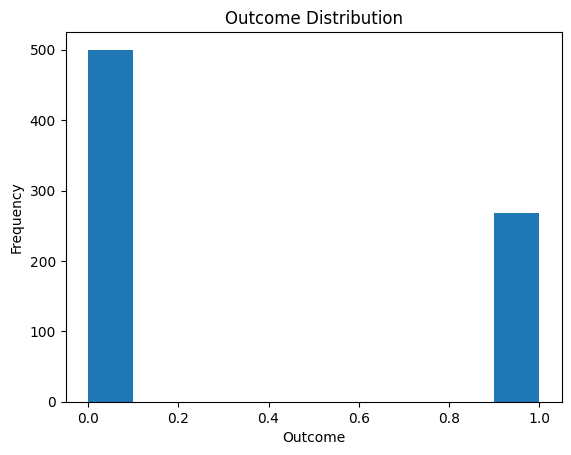

In [11]:
import matplotlib.pyplot as plt

plt.hist(diabetes["Outcome"]);
plt.title("Outcome Distribution");
plt.xlabel("Outcome")
plt.ylabel("Frequency");

In [12]:
outcome = diabetes["Outcome"]
outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

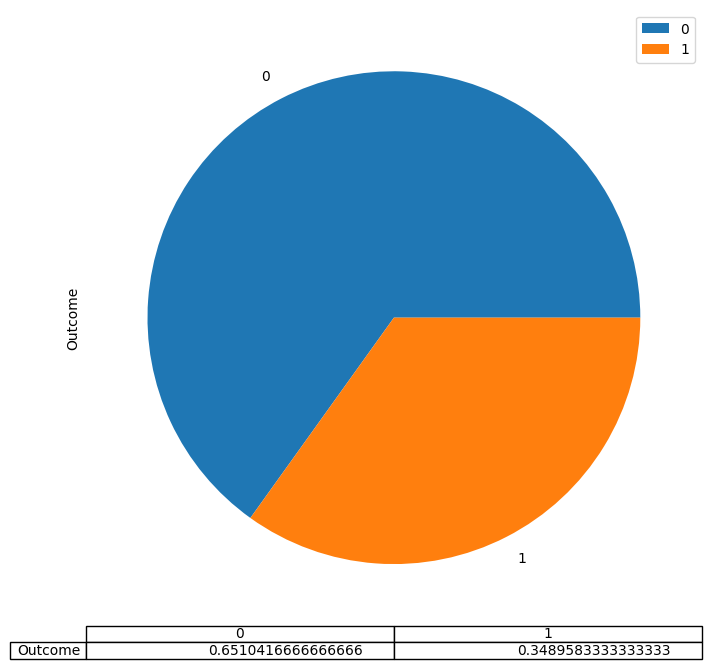

In [13]:
diabetes["Outcome"].value_counts(normalize=True).plot(kind="pie", legend=True, table=True, figsize=(10,8));

In [14]:
#Creating a new variable witout the label column 'diagnosis_M'
df2 = diabetes.drop(columns='Outcome') 
df2.head()  #Checking the dataset if the label columns is droped in the new varibale

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


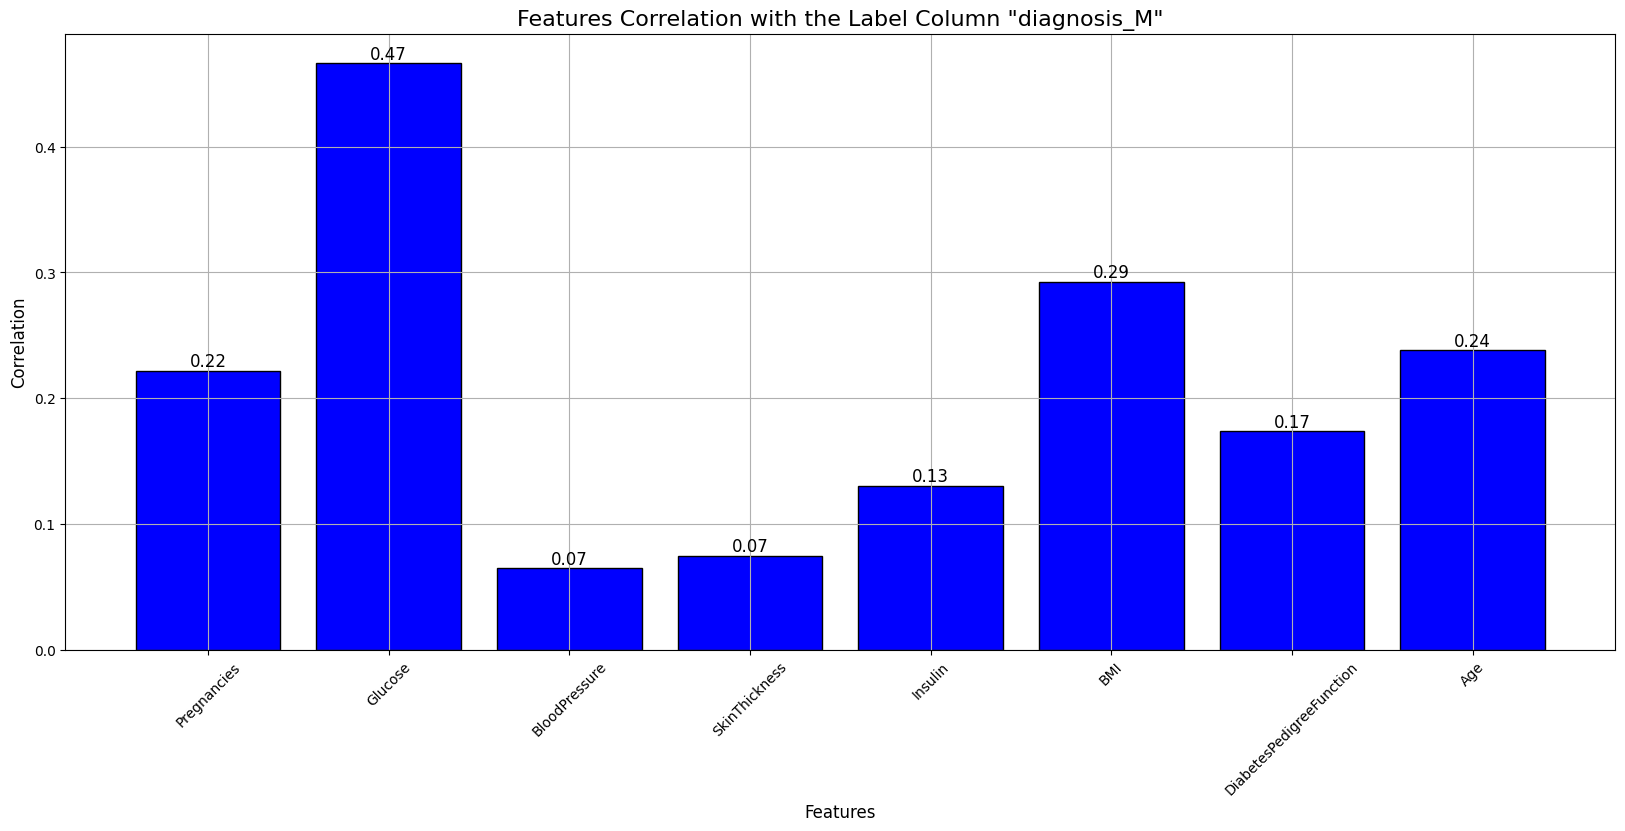

In [15]:
# Computing the correlation between the features and the label column
corrw = df2.corrwith(diabetes['Outcome'])

# Plotting the bar chart using matplotlib
plt.figure(figsize=(20, 8))
plt.bar(corrw.index, corrw.values, color='blue', edgecolor='black')

# Adding title, labels, and grid to the plot
plt.title('Features Correlation with the Label Column "diagnosis_M"', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Adding annotations to the bars
for i, value in enumerate(corrw.values):
    label = f"{value:.2f}"
    plt.annotate(label, (i, value), ha='center', va='bottom', fontsize=12)

# Displaying the plot
plt.show()

Text(844.7222222222224, 0.5, 'Features')

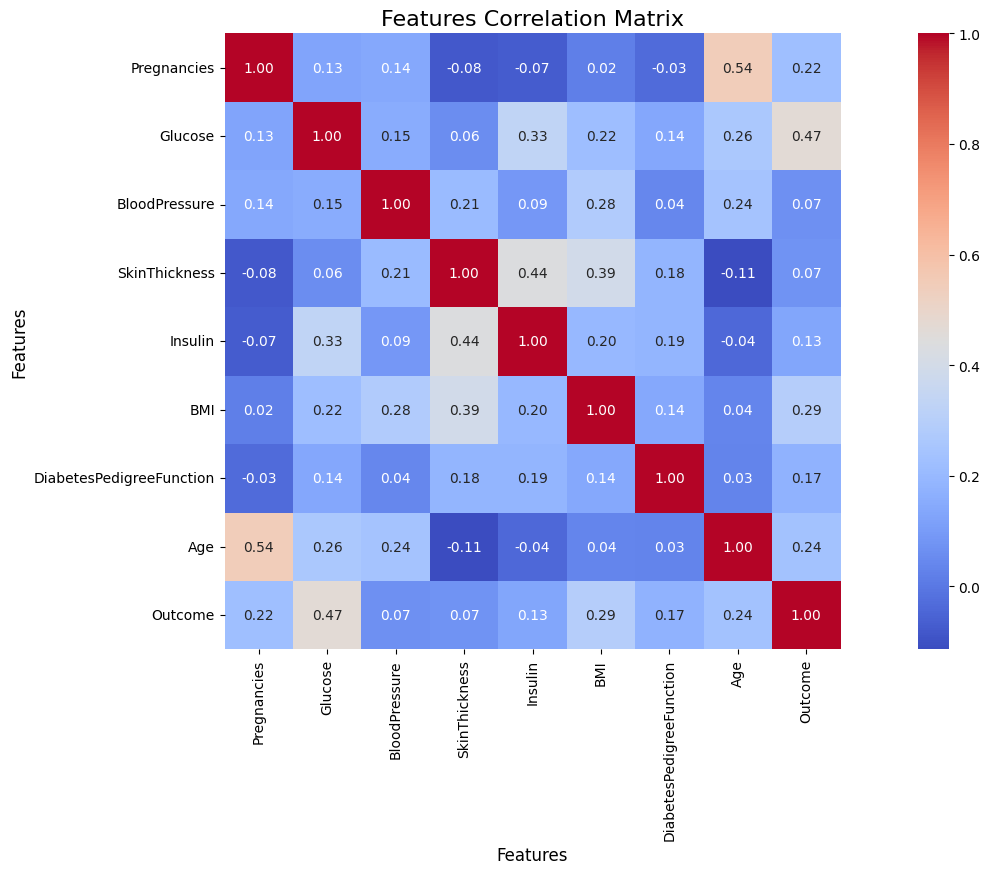

In [16]:
# Plotting a Heatmap to see in depth corrolation 
import seaborn as sns

corr = diabetes.corr()  #Defining a corrolation variavle (Corrolation Matrix)
plt.figure(figsize=(20,8))   
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True, fmt='.2f', square=True)

# Adding title and labels to the plot
plt.title('Features Correlation Matrix', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

In [17]:
# split dataset into features and target variable
X = diabetes.iloc[:, :-1]
y = diabetes.iloc[:, -1]



In [18]:

# split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
(614, 8)
(154, 8)
(614,)
(154,)


In [20]:
print(X_test.index.values)

[668 324 624 690 473 204  97 336 568 148 667 212 199 265 760 356 501 457
 604 213 636 544  86 208 281 209 581 639 328 431 120 363 425 300  67 338
 579  66 582  78 482 456  30 635  33  31  39  77 299 487 629 516 375 451
 511 234 361 494 692 404 754 764 519 254 483 211 210  84 239 409  54 720
 512 109 587 362 734 396 528  10 192 448 174 428 181 748 155 309  65 331
 137 350  81 468 405 470 250 490 220  76 548 290  72 244 394 620  63 716
 659 314 118 728  49 662 411 605 227 168 513   7 196 275  23 383 101 763
 706 259 193 549   2 215 382 648 606 714 731 691 603 617  79 694 433 486
 677 133 218  55 725 355 534 344 296 462]


In [21]:
row_numbers = X_test.index.values
with open("row_numbers.txt", "w") as file:
    file.write("Row numbers of X_test:\n")
    for row_number in row_numbers:
        file.write(str(row_number) + "\n")

In [22]:
# Assuming that you have imported the pandas library and have defined the X_test variable
filename = "row_numbers.txt"
with open(filename, "r") as file:
    row_numbers = file.readlines()[18:]  # skip the first line
row_numbers = [int(x.strip()) for x in row_numbers]

print("Contents of rows from", filename, "in the X_test dataframe:")
display(diabetes.iloc[row_numbers])


Contents of rows from row_numbers.txt in the X_test dataframe:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
457,5,86,68,28,71,30.2,0.364,24,0
604,4,183,0,0,0,28.4,0.212,36,1
213,0,140,65,26,130,42.6,0.431,24,1
636,5,104,74,0,0,28.8,0.153,48,0
544,1,88,78,29,76,32.0,0.365,29,0
...,...,...,...,...,...,...,...,...,...
355,9,165,88,0,0,30.4,0.302,49,1
534,1,77,56,30,56,33.3,1.251,24,0
344,8,95,72,0,0,36.8,0.485,57,0
296,2,146,70,38,360,28.0,0.337,29,1


In [23]:
# scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [24]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)
X_test, y_test = smt.fit_resample(X_test, y_test)

In [25]:
print(X_train.dtype.names)

None


In [26]:

# Random Forest
model = RandomForestClassifier(max_depth=5,random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=42)

ACCURACY FROM TRAINING DATASET :
Accuracy score:  86.66
Confusion matrix: 
 [[332  69]
 [ 38 363]]
Classification report: 
               precision    recall  f1-score   support

           0     0.8973    0.8279    0.8612       401
           1     0.8403    0.9052    0.8715       401

    accuracy                         0.8666       802
   macro avg     0.8688    0.8666    0.8664       802
weighted avg     0.8688    0.8666    0.8664       802

Accuracy Score: 75.76
Confusion Matrix: [[73 26]
 [22 77]]
Classification Report:               precision    recall  f1-score   support

           0       0.77      0.74      0.75        99
           1       0.75      0.78      0.76        99

    accuracy                           0.76       198
   macro avg       0.76      0.76      0.76       198
weighted avg       0.76      0.76      0.76       198



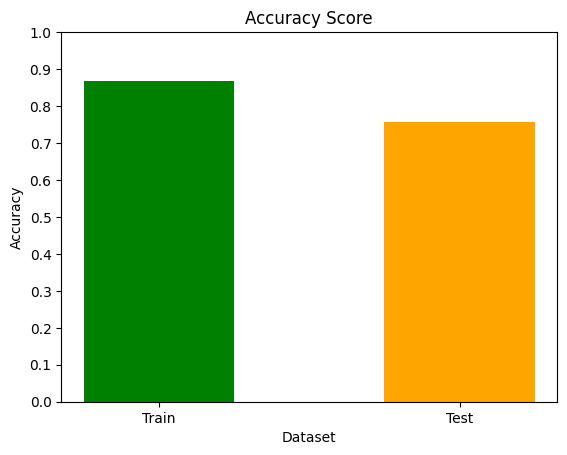

In [27]:
import matplotlib.pyplot as plt

# evaluate the model


y_train_pred = model.predict(X_train)
y_pred_rf = model.predict(X_test)

print("ACCURACY FROM TRAINING DATASET :")
print("Accuracy score: ",round(accuracy_score(y_train,y_train_pred)*100,2))
print("Confusion matrix: \n",confusion_matrix(y_train,y_train_pred))
print("Classification report: \n",classification_report(y_train,y_train_pred,digits=4))


print('Accuracy Score:', round(accuracy_score(y_test, y_pred_rf)*100,2))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_rf))
print('Classification Report:', classification_report(y_test, y_pred_rf))

#plotting graph
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_pred_rf)

# create a bar chart to display accuracy scores
fig, ax = plt.subplots()
ax.bar([0.2, 0.6], [train_acc, test_acc], color=['green', 'orange'], width=0.2)
ax.set_title('Accuracy Score')
ax.set_xlabel('Dataset')
ax.set_ylabel('Accuracy')
ax.set_xticks([0.2, 0.6])
ax.set_xticklabels(['Train', 'Test'])
ax.set_ylim([0, 1])
ax.set_yticks([i*0.1 for i in range(11)])
plt.show()

In [28]:

#Naive bayes

clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

ACCURACY FROM TRAINING DATASET :
Accuracy score:  72.19
Confusion matrix: 
 [[309  92]
 [131 270]]
Classification report: 
               precision    recall  f1-score   support

           0     0.7023    0.7706    0.7348       401
           1     0.7459    0.6733    0.7077       401

    accuracy                         0.7219       802
   macro avg     0.7241    0.7219    0.7213       802
weighted avg     0.7241    0.7219    0.7213       802

ACCURACY FROM TESTING DATASET :
Accuracy Score: 0.7222222222222222
Confusion Matrix: [[73 26]
 [29 70]]
Classification Report:               precision    recall  f1-score   support

           0       0.72      0.74      0.73        99
           1       0.73      0.71      0.72        99

    accuracy                           0.72       198
   macro avg       0.72      0.72      0.72       198
weighted avg       0.72      0.72      0.72       198



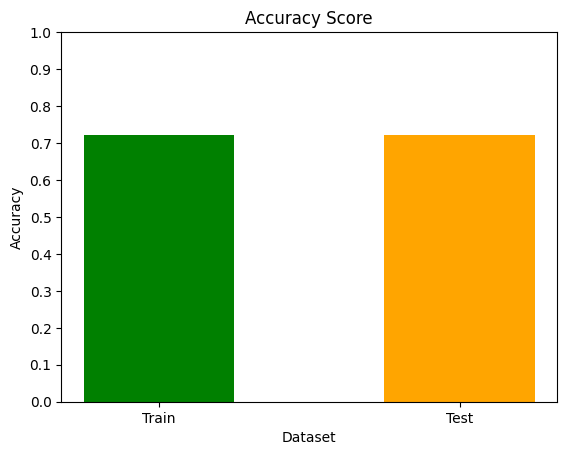

In [29]:
y_nb_train_pred = clf.predict(X_train)
y_pred_nb = clf.predict(X_test)

print("ACCURACY FROM TRAINING DATASET :")
print("Accuracy score: ",round(accuracy_score(y_train,y_nb_train_pred)*100,2))
print("Confusion matrix: \n",confusion_matrix(y_train,y_nb_train_pred))
print("Classification report: \n",classification_report(y_train,y_nb_train_pred,digits=4))

print("ACCURACY FROM TESTING DATASET :")
print('Accuracy Score:', accuracy_score(y_test, y_pred_nb))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_nb))
print('Classification Report:', classification_report(y_test, y_pred_nb))

train_acc = accuracy_score(y_train, y_nb_train_pred)
test_acc = accuracy_score(y_test, y_pred_nb)

# create a bar chart to display accuracy scores
fig, ax = plt.subplots()
ax.bar([0.2, 0.6], [train_acc, test_acc], color=['green', 'orange'], width=0.2)
ax.set_title('Accuracy Score')
ax.set_xlabel('Dataset')
ax.set_ylabel('Accuracy')
ax.set_xticks([0.2, 0.6])
ax.set_xticklabels(['Train', 'Test'])
ax.set_ylim([0, 1])
ax.set_yticks([i*0.1 for i in range(11)])
plt.show()


In [30]:
# # predict on new values
# new_values = pd.DataFrame({
#     'Pregnancies': [0],
#     'Glucose': [180],
#     'BloodPressure': [66],
#     'SkinThickness': [39],
#     'Insulin': [155],
#     'BMI': [42],
#     'DiabetesPedigreeFunction': [1.893],
#     'Age': [25]
# })
# new_values_scaled = scaler.transform(new_values)
# new_prediction = clf.predict(new_values_scaled)
# print('New Prediction:', new_prediction)


In [31]:
# def input(Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age):

#     new_values = pd.DataFrame({
#     'Pregnancies': [Pregnancies] ,
#     'Glucose': [Glucose],
#     'BloodPressure': [BloodPressure],
#     'SkinThickness': [SkinThickness],
#     'Insulin': [Insulin],
#     'BMI': [BMI],
#     'DiabetesPedigreeFunction': [DiabetesPedigreeFunction],
#     'Age': [Age]
#     })
#     new_values_scaled = scaler.transform(new_values)
#     new_prediction = model.predict(new_values_scaled)
#     return new_prediction


In [32]:
# answer = input(3,100,70,30,0,30,0.2,32)
# print(answer)

In [33]:
# !pip install tensorflow 

In [34]:
#NN

# import libraries
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [35]:
# from keras.utils import to_categorical

# # Convert target labels to one-hot encoded vectors
# y_train_onehot = to_categorical(y_train)
# y_test_onehot = to_categorical(y_test)

In [36]:

# define the model
nn = keras.Sequential([
    keras.layers.Dense(16, input_shape=(X_train.shape[1],), activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


In [37]:

# compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [38]:

# train the model
nn.fit(X_train, y_train, epochs=150, batch_size=10, verbose=0)


26/26 [==============================] - 0s 1ms/step
TRAINING
Accuracy Score: 0.8865336658354115
Confusion Matrix: [[340  61]
 [ 30 371]]
Classification Report:               precision    recall  f1-score   support

           0       0.92      0.85      0.88       401
           1       0.86      0.93      0.89       401

    accuracy                           0.89       802
   macro avg       0.89      0.89      0.89       802
weighted avg       0.89      0.89      0.89       802

TESTING
Accuracy Score: 0.696969696969697
Confusion Matrix: [[72 27]
 [33 66]]
Classification Report:               precision    recall  f1-score   support

           0       0.69      0.73      0.71        99
           1       0.71      0.67      0.69        99

    accuracy                           0.70       198
   macro avg       0.70      0.70      0.70       198
weighted avg       0.70      0.70      0.70       198



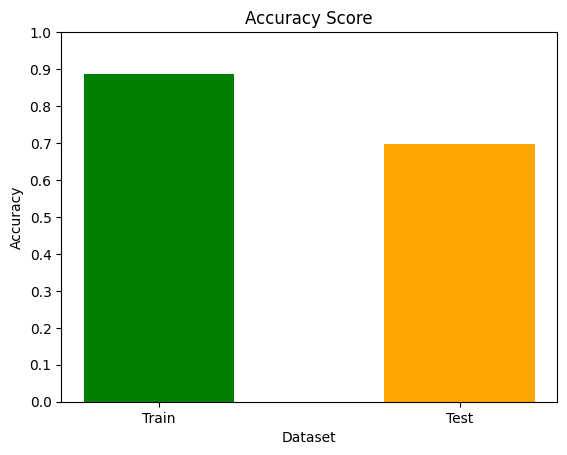

In [39]:
# evaluate the model
y_pred_nn = np.round(nn.predict(X_test))
y_nn_train_pred = np.round(nn.predict(X_train))
print("TRAINING")
print('Accuracy Score:', accuracy_score(y_train, y_nn_train_pred))
print('Confusion Matrix:', confusion_matrix(y_train, y_nn_train_pred))
print('Classification Report:', classification_report(y_train, y_nn_train_pred))
print("TESTING")
print('Accuracy Score:', accuracy_score(y_test, y_pred_nn))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_nn))
print('Classification Report:', classification_report(y_test, y_pred_nn))

#plotting graph
train_acc = accuracy_score(y_train, y_nn_train_pred)
test_acc = accuracy_score(y_test, y_pred_nn)

# create a bar chart to display accuracy scores
fig, ax = plt.subplots()
ax.bar([0.2, 0.6], [train_acc, test_acc], color=['green', 'orange'], width=0.2)
ax.set_title('Accuracy Score')
ax.set_xlabel('Dataset')
ax.set_ylabel('Accuracy')
ax.set_xticks([0.2, 0.6])
ax.set_xticklabels(['Train', 'Test'])
ax.set_ylim([0, 1])
ax.set_yticks([i*0.1 for i in range(11)])
plt.show()



7/7 [==============================] - 0s 1ms/step


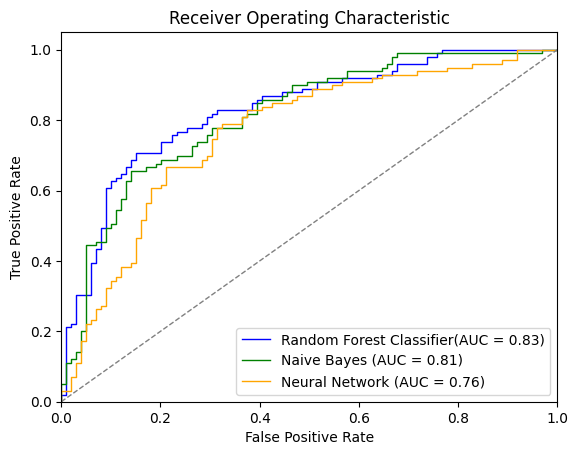

In [40]:
#ROC AUC

from sklearn.metrics import roc_curve, auc

# Predict probabilities for test set for all three models
y_pred_proba_rf = model.predict_proba(X_test)[:, 1]
y_pred_proba_nb = clf.predict_proba(X_test)[:, 1]
y_pred_proba_nn = nn.predict(X_test)[:, 0]

# Compute ROC curve and ROC area for each model
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_logreg = auc(fpr_rf, tpr_rf)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_proba_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_proba_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plot ROC curve
plt.plot(fpr_rf, tpr_rf, color='blue', lw=1, label='Random Forest Classifier(AUC = %0.2f)' % roc_auc_logreg)
plt.plot(fpr_nb, tpr_nb, color='green', lw=1, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot(fpr_nn, tpr_nn, color='orange', lw=1, label='Neural Network (AUC = %0.2f)' % roc_auc_nn)

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# GUI

In [41]:
import gradio as gr

In [42]:
#gradio with 8 fetaures

def input(Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age):

    new_values = pd.DataFrame({
    'Pregnancies': [Pregnancies] ,
    'Glucose': [Glucose],
    'BloodPressure': [BloodPressure],
    'SkinThickness': [SkinThickness],
    'Insulin': [Insulin],
    'BMI': [BMI],
    'DiabetesPedigreeFunction': [DiabetesPedigreeFunction],
    'Age': [Age]
    })
    new_values_scaled = scaler.transform(new_values)
    new_prediction = model.predict(new_values_scaled)
    return new_prediction



In [46]:
import pickle

# save the scaler object to a file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [43]:
#gradio with 8 fetaures

demo = gr.Interface(fn=input,
                    inputs=["number","number","number","number","number","number","number","number"],
                    outputs=['text'],
                     title="Diabetes Prediction Using Pima Indian Diabetes Dataset"
                    # theme='huggingface',
                    # css = """ ,
                    # body {background-color : grey}
                    # """
                    )


demo.launch() 

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [ ]:
# from test set (After smote)

# 1

# 355          1     flask too
# 296          1     flask too
# 199          1 (predicting wrong)
# 356          1 
# 604          1
# 213          1

# from test set 

# 0

# 457          0   flask too
# 636          0   flask too
# 544          0
# 534          0
# 344          0
# 462          0 (predicting wrong)
# 668          0 (predicting wrong)


In [ ]:
# from test set (Without smote)

# 1

# 355          1
# 296          1 (predicting wrong)
# 199          1 (predicting wrong)
# 356          1 (predicting wrong)
# 604          1
# 213          1 (predicting wrong)

# from test set 

# 0

# 457          0
# 636          0
# 544          0
# 534          0
# 344          0
# 462          0


# FEATURE SELECTION

In [449]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

# Initialize a random forest classifier
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)


In [450]:
type(X_train)

numpy.ndarray

In [451]:
print(type(y_train))
y_train = y_train.values
print(type(y_train))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [452]:
boruta_feature_selector = BorutaPy(estimator=rf, n_estimators='auto', max_iter=100,  verbose=2, random_state=1)


# Fit the Boruta feature selector to the data
boruta_feature_selector.fit(X_train, y_train)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	1
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	1
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	1
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	1
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	1
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	1
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	1
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	1
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	1
Iteration: 	17 / 

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=74, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x16DA11D7940),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x16DA11D7940, verbose=2)

In [453]:
boruta_feature_selector.support_

array([ True,  True, False, False,  True,  True,  True,  True])

In [454]:
print("No. of significant features: ", boruta_feature_selector.n_features_)

No. of significant features:  6


In [455]:
type(X_test)

numpy.ndarray

In [456]:
# Transform the data to include only the selected features
X_train_selected = boruta_feature_selector.transform(X_train)
X_test_selected = boruta_feature_selector.transform(X_test)



In [457]:
print(X_train_selected.shape)
print(X_test_selected.shape)
print(y_train.shape)
print(y_test.shape)

(614, 6)
(154, 6)
(614,)
(154,)


In [458]:
#Fitting standard scaler with 6 fetaures previously fitted with 8 features hence it cant be used be used 
# while scaling new values which has only 6 variables 

scaler_fs = StandardScaler()
X_train_selected = scaler_fs.fit_transform(X_train_selected)
X_test_selected = scaler_fs.fit_transform(X_test_selected)

In [459]:
print(type(X_train_selected))
print(X_train_selected.dtype.names)

<class 'numpy.ndarray'>
None


In [460]:
# To display the values pf the X_train_selected variable, convert X_train_selected into dataframe and use the .head() function

# X_train_selected = pd.DataFrame(X_train_selected)
# X_train_selected = X_train_selected.values

In [461]:
# X_train_selected

In [462]:
# X_train_selected[:, 0]

In [463]:
# X_train_selected1 = np.empty(shape=(614,), dtype=[('Pregnancies', float), ('Glucose', float),('Insulin', float), ('BMI', float), ('DiabetesPedigreeFunction', float),  ('Age', float)])
# X_train_selected1['Pregnancies'] = X_train_selected[:, 0]
# X_train_selected1['Glucose'] =  X_train_selected[:, 1]
# X_train_selected1['Insulin'] =  X_train_selected[:, 2]
# X_train_selected1['BMI'] =  X_train_selected[:, 3]
# X_train_selected1['DiabetesPedigreeFunction'] =  X_train_selected[:, 4]
# X_train_selected1['Age'] =  X_train_selected[:, 5]



In [464]:
# print(X_train_selected1.dtype.names)
# print(X_test_selected.dtype.names)

In [465]:
# print(X_train_selected1.shape)
# print(X_test_selected.shape)
# print(y_train.shape)
# print(y_test.shape)

In [466]:
# X_train_selected1['Pregnancies']

In [467]:

# # Convert the input array to a uniform data type
# X_train_selected1 = X_train_selected1.astype(np.float32)

In [468]:
#Random forest


from sklearn.ensemble import RandomForestClassifier
import datetime

RFC1 = RandomForestClassifier(max_depth=6)

# feature_names = ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
# X_train_selected = X_train[:, [0, 1, 4, 5, 6, 7]]  # select the appropriate columns from X_train
RFC1.fit(X_train_selected, y_train)

start = datetime.datetime.now()
end = datetime.datetime.now()
print("Total execution time: ", end-start)

y_rfc_train_pred = RFC1.predict(X_train_selected)
y_rfc_test_pred = RFC1.predict(X_test_selected)



print("ACCURACY FROM TRAINING DATASET :")
print("Accuracy score: ",round(accuracy_score(y_train,y_rfc_train_pred)*100,2))
print("Confusion matrix: \n",confusion_matrix(y_train,y_rfc_train_pred))
print("Classification report: \n",classification_report(y_train,y_rfc_train_pred,digits=4))

print(" ACCURACY FROM TESTING DATASET :")
print("Accuracy score: ",accuracy_score(y_test,y_rfc_test_pred)*100)
print("Confusion matrix: \n",confusion_matrix(y_test,y_rfc_test_pred))
print("Classification report: \n",classification_report(y_test,y_rfc_test_pred,digits=4))

Total execution time:  0:00:00
ACCURACY FROM TRAINING DATASET :
Accuracy score:  89.41
Confusion matrix: 
 [[384  17]
 [ 48 165]]
Classification report: 
               precision    recall  f1-score   support

           0     0.8889    0.9576    0.9220       401
           1     0.9066    0.7746    0.8354       213

    accuracy                         0.8941       614
   macro avg     0.8977    0.8661    0.8787       614
weighted avg     0.8950    0.8941    0.8920       614

 ACCURACY FROM TESTING DATASET :
Accuracy score:  75.32467532467533
Confusion matrix: 
 [[81 18]
 [20 35]]
Classification report: 
               precision    recall  f1-score   support

           0     0.8020    0.8182    0.8100        99
           1     0.6604    0.6364    0.6481        55

    accuracy                         0.7532       154
   macro avg     0.7312    0.7273    0.7291       154
weighted avg     0.7514    0.7532    0.7522       154



In [469]:
#NAIVE BAYES

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create Naive Bayes classifier object and train on the training data
nb_clf = GaussianNB()
nb_clf.fit(X_train_selected, y_train)

# Use the trained models to predict on the testing data
nb_train_pred_fs = nb_clf.predict(X_train_selected)
nb_y_pred_fs = nb_clf.predict(X_test_selected)

print("ACCURACY FROM TRAINING DATASET :")
print("Accuracy score: ",round(accuracy_score(y_train,nb_train_pred_fs)*100,2))
print("Confusion matrix: \n",confusion_matrix(y_train,nb_train_pred_fs))
print("Classification report: \n",classification_report(y_train,nb_train_pred_fs,digits=4))


print("ACCURACY FROM Test DATASET :")
print("Accuracy score: ",round(accuracy_score(y_test,nb_y_pred_fs)*100,2))
print("Confusion matrix: \n",confusion_matrix(y_test,nb_y_pred_fs))
print("Classification report: \n",classification_report(y_test,nb_y_pred_fs,digits=4))




ACCURACY FROM TRAINING DATASET :
Accuracy score:  74.92
Confusion matrix: 
 [[342  59]
 [ 95 118]]
Classification report: 
               precision    recall  f1-score   support

           0     0.7826    0.8529    0.8162       401
           1     0.6667    0.5540    0.6051       213

    accuracy                         0.7492       614
   macro avg     0.7246    0.7034    0.7107       614
weighted avg     0.7424    0.7492    0.7430       614

ACCURACY FROM Test DATASET :
Accuracy score:  79.87
Confusion matrix: 
 [[85 14]
 [17 38]]
Classification report: 
               precision    recall  f1-score   support

           0     0.8333    0.8586    0.8458        99
           1     0.7308    0.6909    0.7103        55

    accuracy                         0.7987       154
   macro avg     0.7821    0.7747    0.7780       154
weighted avg     0.7967    0.7987    0.7974       154



In [470]:
# predict on new values
new_values = pd.DataFrame({
    'Pregnancies': [3],
    'Glucose': [100],
    'BloodPressure': [70],
    'SkinThickness': [30],
    'Insulin': [0],
    'BMI': [30],
    'DiabetesPedigreeFunction': [0.2],
    'Age': [32]
})
new_values_scaled = scaler.transform(new_values)
new_prediction = np.round(nn.predict(new_values_scaled))
print('New Prediction:', new_prediction)

1/1 [==============================] - 0s 33ms/step
New Prediction: [[0.]]


In [ ]:
#NN With reduced features

In [471]:
# define the model
nn_new = keras.Sequential([
    keras.layers.Dense(16, input_shape=(X_train_selected.shape[1],), activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [472]:

# compile the model
nn_new.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [473]:

# train the model
nn_new.fit(X_train_selected, y_train, epochs=100, batch_size=32, verbose=0)


In [475]:
# evaluate the model
y_pred_nn_new = np.round(nn_new.predict(X_test_selected))
print('Accuracy Score:', accuracy_score(y_test, y_pred_nn_new))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_nn_new))
print('Classification Report:', classification_report(y_test, y_pred_nn_new))

5/5 [==============================] - 0s 2ms/step
Accuracy Score: 0.7727272727272727
Confusion Matrix: [[85 14]
 [21 34]]
Classification Report:               precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



# GUI

In [20]:
#! pip install gradio

In [349]:
# predict on new values
new_values1 = pd.DataFrame({
    'Pregnancies': [0],
    'Glucose': [180],
    'Insulin': [155],
    'BMI': [42],
    'DiabetesPedigreeFunction': [1.893],
    'Age': [25]
})
new_values_scaled1 = scaler_fs.transform(new_values1)
new_prediction = RFC1.predict(new_values_scaled1)
print('New Prediction:', new_prediction)

New Prediction: [1]


C:\Users\Lenovo GEIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [130]:
import gradio as gr

In [131]:
#gradio with 6 fetaures

def input(Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age):
    
    new_values1 = pd.DataFrame({
    'Pregnancies': [Pregnancies] ,
    'Glucose': [Glucose],
    'Insulin': [Insulin],
    'BMI': [BMI],
    'DiabetesPedigreeFunction': [DiabetesPedigreeFunction],
    'Age': [Age]
    })
    
    new_values_scaled1 = scaler_fs.transform(new_values1)
    new_prediction = RFC1.predict(new_values_scaled1)
    return new_prediction

In [129]:
#gradio with 6 fetaures

demo = gr.Interface(fn=input,
                    inputs=["number","number","number","number","number","number"],
                    outputs=['text'],
                    title="Diabetes Prediction Using Pima Indian Diabetes Dataset"
                    # theme='huggingface',
                    # css = """ ,
                    # body {background-color : grey}
                    # """
                    )

demo.launch() 

NameError: name 'gr' is not defined

In [24]:
# row numbers
# 37          1
# 31          1
# 32          0
# 44          0

# 38          L

# 43          1 (Working with 6 features also)
# 45          1 (Working with 6 features also)

1/1 [==============================] - 0s 33ms/step


FLASK

In [44]:
import pickle

In [45]:
with open('diabetes_model.pkl','wb') as files:
    pickle.dump(model,files)